In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('World military power.xlsx', header=[0,1])

In [3]:
df

2020 ranking                               Airforce Strength  \
    Military Strength Military Strength Power Index Aircraft Strength   
0         Afghanistan                        1.3444       Afghanistan   
1             Albania                        2.3137           Albania   
2             Algeria                        0.4659           Algeria   
3              Angola                        0.8379            Angola   
4           Argentina                        0.6521         Argentina   
..                ...                           ...               ...   
133         Venezuela                        0.6449         Venezuela   
134           Vietnam                        0.3559           Vietnam   
135             Yemen                        1.2412             Yemen   
136            Zambia                        1.6464            Zambia   
137          Zimbabwe                        1.7577          Zimbabwe   

                                                          \
    Aircraft Strength value Fighter/Interceptor Strength   
0                     260.0                  Afghanistan   
1                      19.0                      Albania   
2                     551.0                      Algeria   
3                     295.0                       Angola   
4                     227.0                    Argentina   
..                      ...                          ...   
133                   260.0                    Venezuela   
134                   293.0                      Vietnam   
135                   169.0                        Yemen   
136                   108.0                       Zambia   
137                    90.0                     Zimbabwe   

                                                                 \
    Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                  0.0              Afghanistan   
1                                  0.0                  Albania   
2                                103.0                  Algeria   
3                                 72.0                   Angola   
4                                 24.0                Argentina   
..                                 ...                      ...   
133                               38.0                Venezuela   
134                               77.0                  Vietnam   
135                               77.0                    Yemen   
136                               18.0                   Zambia   
137                               10.0                 Zimbabwe   

                                                                      \
    Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                             25.0                       Afghanistan   
1                              0.0                           Albania   
2                             22.0                           Algeria   
3                             18.0                            Angola   
4                              7.0                         Argentina   
..                             ...                               ...   
133                            0.0                         Venezuela   
134                            0.0                           Vietnam   
135                            0.0                             Yemen   
136                            0.0                            Zambia   
137                            0.0                          Zimbabwe   

                                             ...         Manpower  \
    Transport Aircraft Fleet Strength value  ... Total Population   
0                                      30.0  ...      Afghanistan   
1                                       0.0  ...          Albania   
2                                      59.0  ...          Algeria   
3                                      30.0  ...           Angola   
4                                       9.0  ...       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [5]:
df.columns = [value[0]+"_"+value[1] for value in df.columns.values]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Military Strength                             138 non-null    object 
 1   2020 ranking_Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength_Aircraft Strength                        138 non-null    object 
 3   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 4   Airforce Strength_Fighter/Interceptor Strength             138 non-null    object 
 5   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 6   Airforce Strength_Attack Aircraft Strength                 138 non-null    object 
 7   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 8   Airforce S

In [7]:
df.isnull().sum().sort_values(ascending=False)

Geography_Total Coastline Coverage value                     29
Geography_Total Coastline Coverage                           29
Navy Strength_Submarine Fleet Strength                       23
Navy Strength_Frigate Fleet Strength value                   23
Navy Strength_Frigate Fleet Strength                         23
Navy Strength_Destroyer Fleet Strength value                 23
Navy Strength_Destroyer Fleet Strength                       23
Navy Strength_Submarine Fleet Strength value                 23
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Aircraft Carrier Fleet Strength                23
Navy Strength_Navy Fleet Strengths                           14
Navy Strength_Navy Fleet Strengths value                     14
Geography_Total Border Coverage                               9
Geography_Total Border Coverage value                         9
Airforce Strength_Attack Helicopter Fleet Strength            0
Manpower_Available Manpower             

In [8]:
filldict = {
        "Geography_Total Coastline Coverage value" : 0,
    "Geography_Total Coastline Coverage" : "None",
    "Navy Strength_Submarine Fleet Strength" : "None",
    "Navy Strength_Frigate Fleet Strength value" : 0,
    "Navy Strength_Frigate Fleet Strength" : "None",
    "Navy Strength_Destroyer Fleet Strength value" : 0,
    "Navy Strength_Destroyer Fleet Strength" : "None",
    "Navy Strength_Submarine Fleet Strength value" : 0,
    "Navy Strength_Aircraft Carrier Fleet Strength value" : 0,
    "Navy Strength_Aircraft Carrier Fleet Strength" : "None",
    "Navy Strength_Navy Fleet Strengths" : "None",
    "Navy Strength_Navy Fleet Strengths value" : 0,
    "Geography_Total Border Coverage" : "None",
    "Geography_Total Border Coverage value": 0
    
}


In [9]:
df.fillna(value=filldict, inplace=True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.isnull().sum().sum()

0

In [12]:
df['2020 ranking_Military Strength Power Index']

0      1.3444
1      2.3137
2      0.4659
3      0.8379
4      0.6521
        ...  
133    0.6449
134    0.3559
135    1.2412
136    1.6464
137    1.7577
Name: 2020 ranking_Military Strength Power Index, Length: 138, dtype: float64

In [13]:
df.isnull().sum().sum()

0

In [14]:
import re
valcolumns = []
def match(x):
    ismatch = re.search("value",x)
    if ismatch is not None:
        valcolumns.append(x)

In [15]:
_ = [match(column) for column in df.columns]

In [16]:
valcolumns

['Airforce Strength_Aircraft Strength value',
 'Airforce Strength_Fighter/Interceptor Strength value',
 'Airforce Strength_Attack Aircraft Strength value',
 'Airforce Strength_Transport Aircraft Fleet Strength value',
 'Airforce Strength_Trainer Aircraft Fleet value',
 'Airforce Strength_Helicopter Fleet Strength value',
 'Airforce Strength_Attack Helicopter Fleet Strength value',
 'Land Strength_Tank Strength value',
 'Land Strength_AFV/APC Strength value',
 'Land Strength_Self-Propelled Artillery Strength value',
 'Land Strength_Towed Artillery Strength value',
 'Land Strength_Rocket Projector Strength value',
 'Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value',
 'Finances_defense spending budget value',
 'Finances_External Debt value',
 'Logistics_Airport Totals value',
 'Natural resources_Oil

In [17]:
valcolumns.insert(0,"2020 ranking_Military Strength")
df_calc = df[valcolumns]

In [18]:
df_calc

,2020 ranking_Military Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
134,Vietnam,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
135,Yemen,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
136,Zambia,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0,6043.0


In [19]:
df_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Military Strength                             138 non-null    object 
 1   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 2   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 3   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 4   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 6   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 7   Airforce Strength_Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Land Stren

In [20]:
s = df_calc.dtypes
ccolumns = s.where(s == "object").dropna().index.tolist()
ccolumns.pop(0)

'2020 ranking_Military Strength'

In [21]:
df_calc[ccolumns]

,Finances_defense spending budget value,Finances_External Debt value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value
0,"12,00,00,00,000","2,84,00,00,000",0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,"25,00,00,000","9,50,50,00,000",16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
...,...,...,...,...,...,...,...,...,...,...
133,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0
134,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0
135,"1,40,00,00,000","7,06,80,00,000",12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0
136,"4,00,00,000","11,66,00,00,000",0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0


In [22]:
def func(x):
    try:
        sub = re.sub(",","",x)
        return sub
    except:
        return x
        
for column in ccolumns:
    df_calc[column] = df_calc[column].apply(func)

In [23]:
df_calc

,2020 ranking_Military Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,168300000,1519438,3057220,28748.0,362.0,41.0,691.0
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0.0,6734.0
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000,82300.0,8273000000,6244205,30355880,1246700,1600.0,1300.0,5369.0
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,2007000,575000,300900000000,14260129,31689176,912050,2800.0,7100.0,5267.0
134,Vietnam,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,271400,525000,4400000000,51043216,97040334,331210,3444.0,17702.0,4616.0
135,Yemen,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,145000,3000000000,11266221,28667230,527968,1906.0,0.0,1601.0
136,Zambia,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,88.0,0.0,21000.0,0.0,6166905,16445079,752618,0,2250.0,6043.0


In [24]:
typecol = dict.fromkeys(ccolumns, "float64")

In [25]:
df_calc = df_calc.astype(typecol)

In [26]:
df_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Military Strength                             138 non-null    object 
 1   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 2   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 3   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 4   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 6   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 7   Airforce Strength_Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Land Stren

In [27]:
df_dummied = pd.get_dummies(df_calc)
df = df_calc.copy()
df_calc.drop("2020 ranking_Military Strength", axis=1, inplace=True)

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters,x):
     for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(20,df_calc)

Number of cluster2,silhouette0.9227153206136331
Number of cluster3,silhouette0.8995442950361631
Number of cluster4,silhouette0.8671436271439988
Number of cluster5,silhouette0.8675195540746113
Number of cluster6,silhouette0.7789462745536558
Number of cluster7,silhouette0.7817947546427719
Number of cluster8,silhouette0.7847423623940275
Number of cluster9,silhouette0.6818555400770493
Number of cluster10,silhouette0.6795886784648353
Number of cluster11,silhouette0.6793362279710172
Number of cluster12,silhouette0.6941951760192707
Number of cluster13,silhouette0.6880854939472278
Number of cluster14,silhouette0.6864150078335879
Number of cluster15,silhouette0.6637555115951308
Number of cluster16,silhouette0.5705589275374753
Number of cluster17,silhouette0.5561304638545694
Number of cluster18,silhouette0.6040798193691691
Number of cluster19,silhouette0.6052387988993834
Number of cluster20,silhouette0.56455866905861


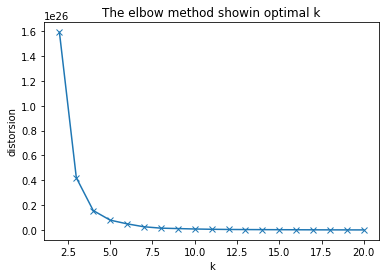

In [30]:
import matplotlib.pyplot as plt

plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('distorsion')
plt.title('The elbow method showin optimal k')
plt.show()

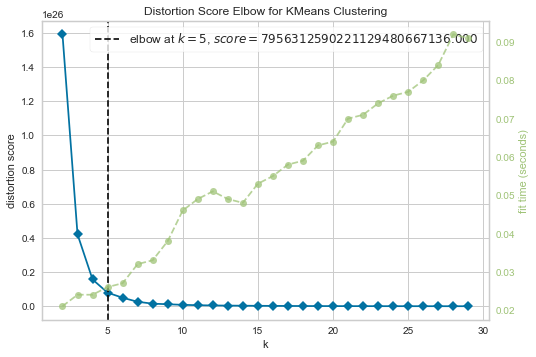

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metrics="silhoutte",timings=True)
visualizer.fit(df_calc)
visualizer.show()

In [40]:
km=KMeans(n_clusters=5)
model=km.fit(df_calc)
cluster=model.predict(df_calc)

In [41]:
cluster

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

In [42]:
(silhouette_score(df_calc,cluster))

0.8675195540746113

In [43]:
df['cluster']=cluster

In [44]:
df['cluster'].value_counts()

0    124
3      9
2      3
4      1
1      1
Name: cluster, dtype: int64

In [45]:
df

,2020 ranking_Military Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,...,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value,cluster
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0,0
134,Vietnam,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0,0
135,Yemen,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0,0
136,Zambia,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,752618.0,0.0,2250.0,6043.0,0


In [46]:
df_view = df.groupby(['cluster'])

In [47]:
df_view["2020 ranking_Military Strength","cluster"].first()

,2020 ranking_Military Strength,cluster
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Argentina,0
6,Australia,3
12,Belgium,3
22,Canada,3
26,China,3
40,France,2


In [ ]:
df_view["2020 ranking_Military Strength","cluster"].last()